# SVM's and Classification- and Regression Trees 

This workshop is intended to support Lecture 6 of Student For AI's Academy of AI. The aim of this notebook is to give some practical examples of SVM's (Support Vector Machine) and CART's(Classification And Regression Trees). This should you give a proper insight into how the algorithms work on a fundamental level. 

The workshop is intended to last for 1 hour, however since everything cant be covered in that one hour, there is more material than one can cover. Please go over this in your own time if you want to get a real appreciation of the algorithms. 

The content covered will be:

* Support Vector Machines
    * Visualisation
    * Implementation
* Classification Trees
* Regression Trees

## Support Vector Machines

A support Vector machines tries to find a line that maximises the distance between the line itself and the closest points in the plot. These points are called support vectors, and are the only points who influence the shape of the final split. The line has to maximise its margin between these two points, and that is done by making sure that the following requierments are met:

* The line has to be equidistant to both points.
* The line should be as far away from both points as possible. 

By choosing different kernels you can allow your line to have fancier shapes, as illustrated in the plots below.
The next 4 blocks are just to make some nice plots. 

### Visualization

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
#Import the SVC module from sklearn.svm
from sklearn.svm import SVC

/home/eirik/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

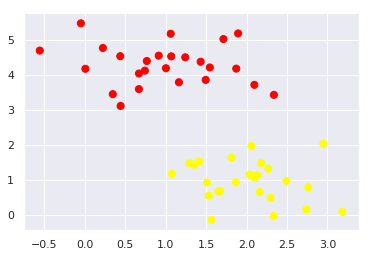

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [0]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [0]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

Now lets try something a bit harder. Below we are changing our data to a circle pattern.

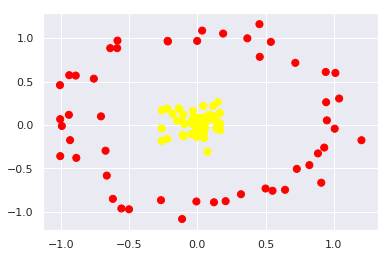

In [0]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

If we naively fit this dataset with a linear kernel, this would be our classification. As you can see, this is not a very good result.

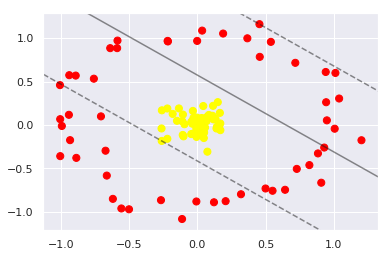

In [0]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

So if our linear kernel works, maybe a polynomial could fit it. Try changing the "degree" of the kernel to see what happens to the classifier

/home/eirik/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


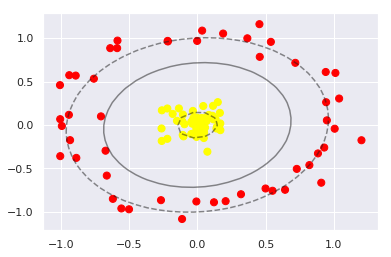

In [0]:
clf = SVC(kernel='poly',degree=2).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

Did you find any good fits? If not you can try to use the RBF kernel, which is based on the euclidean distance metric

/home/eirik/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


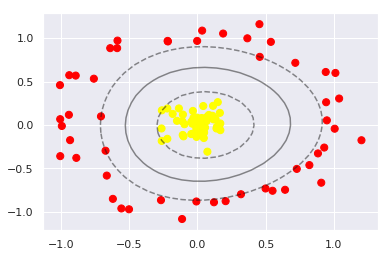

In [0]:
clf = SVC(kernel='rbf', C=1E6).fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

There are plenty of other kernels out there, and we encourage you to go out and try other kernels as well. If you google "SVM kernels", or even "sklearn SVM kernels", you will get a lot of results to further your knowledge of SVM's.

## Classification Trees 

Please read through this function as we are going to use it for vizualizing the splits of the classification trees now.

In [0]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               vmin=y.min(), vmax=y.max(), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    # This is basically predicting the class of every single position of the plot
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=1,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Vizualising classification trees
The function above is simply to help us see the regions that the classifiers create to categorize our data. Now lets try and solve the circle problem as above, but now with decision trees instead of SVM's. You can also notice that we have changed our colormap, this is just to show you that there are multiple colormaps to choose from plus this one turned to work wiht the vizualizing function. First just plot the data to see what we are dealing with again.

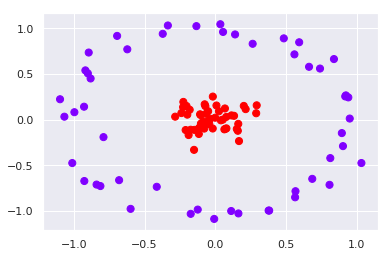

In [0]:
from sklearn import tree
X, y = make_circles(100, factor=.1, noise=.1)
clf = tree.DecisionTreeClassifier()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

Great, so its the same data here as above, rougly speaking, lets try and fit a decisiontree classifier with a maximum depth of 4 branches.

PS the tree is fitted inside the vizualizing function, so you do not need to fit it before you pass it in.

Run the block below several times, and observe if anything changes, why would it change? Also try and change the max_depth and see how that affects the classification.

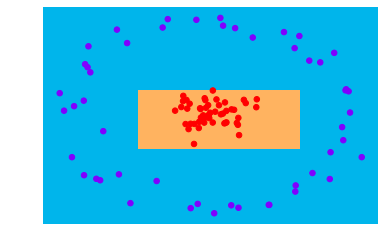

In [0]:
visualize_classifier(tree.DecisionTreeClassifier(max_depth=4), X, y)

## More than 2 classes

Lets try having more than just two classes, the function below allows you to create various distributions aimed for classification problems, feel free to mess around with the values to see how it works.

NB: n_classes is the range of values y can have, n_features is how many variables X consists of.

However, do leave n_features alone, as all our visualisations are 2D we can only take a 2D(n_feature=2). For future reference, the way we deal with more than 2 features for visualization is that we use something called Principal Component Analysis to help us shrink the dimensonality of the problem from 10D-100D down to 2D, and then we use that transformed 2D input for visualization.

In [0]:
from sklearn.datasets.samples_generator import make_classification
X,y=make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0, n_classes=4, n_clusters_per_class=1)

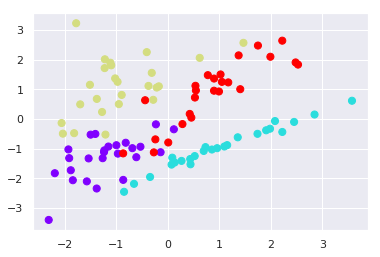

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

Again I advice you to try changing the max_depth metric. What happens if you leave it out? 

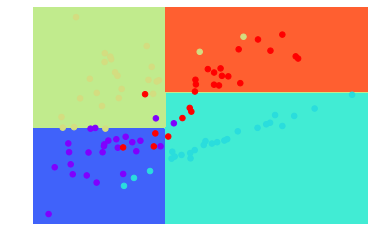

In [0]:
visualize_classifier(tree.DecisionTreeClassifier(max_depth=3), X, y)

## Regression Trees

While the infrastructure of the rules of a regression tree is the same to that of a classification tree the output is quite different. While the classifier predicts distinct classes, the regressors  should predict countinous targets like this one.

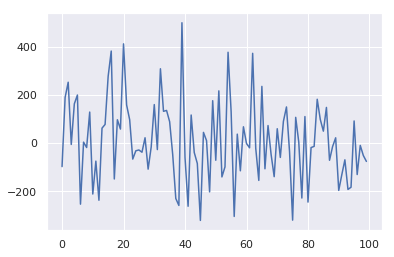

In [0]:
from sklearn.datasets.samples_generator import make_regression
X,y = make_regression()
plt.plot(y)

So how do we do that with only simple rules? Start of with a max_depth of one and see how the predicting changes as you increase the depth.

In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="mse",max_depth=2)

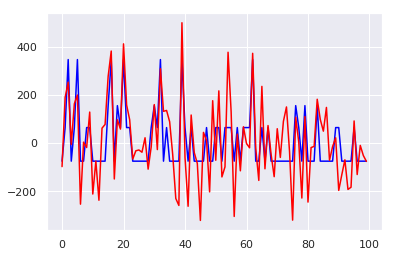

In [0]:
regressor.fit(X,y)
y_pred=regressor.predict(X)
plt.plot(y_pred,color="blue")
plt.plot(y,color="red")

Hopefully you noticed that for small max_depths the output was highly quantized. In fact, the number of levels is limited to 2^max_depth. Obviously as we increase the max_depth higher and higher, the two signals become indistinguishable, which typically would mean an over fitting, so its important to manage the max_depth properly to make sure you find an optimal compromise between quantization, generalization and general quality of prediction. Luckily you have already seen a lot of ways to evaluate the profiency of your models.

TEST